## Tutorial 2: Uncertainty
[v 2023-02-01]
Developed by Rebeckah Fussell for Cornell Physics Labs. [Adapted by L.A. Bumm 2022-09-16]

In this tutorial we will learn about statistical tools to understand repeated measurements (for example, a dataset generated by repeatedly measuring the period of a pendulum without any changes to the lab setup). 

Let's start by importing some packages that will be useful. Run the code cell below with SHIFT + ENTER.

Important note: the code cells throughout this tutorial will build off of previous code cells. It is important to run every code cell (SHIFT + ENTER) in the document up to the point where you are working every time you open this tutorial. If you get an error message (particularly one that says that a particular variable is not defined) after attempting to run a code cell, first make sure that you have run every previous code cell. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The code below generates a histogram showing the results of 25 trials measuring the period $T$ of a pendulum. The precision of the measuring instrument, also known as *instrumental precision*, was $\pm$ 0.005 s because the instrument (a stopwatch) displayed values to the nearest 0.01 s. We will estimate instrumental precision as half of the last known digit. 

Double click this cell to write your answer to the question in the space below it. It may not look like there is space, but you can simply start typing in the line below the question.

### 1. Run the cell below, and observe the histogram. Do not spend time worrying about the details of the code inside the <span style= 'font-family:Courier'>pendulum_hist()</span> function. Run the cell a few more times so that different histograms are generated. How does the histogram change each time you generate a new one? What stays the same?  (0.5 points)

Hint: If you see an error that np is not defined, make sure you imported the packages above. It is good practice to make sure that you have run every code cell up to the point in the document you are working in every time you open the tutorial. 


> The blue bars of the histogram, representing the frequency of periods measured, change with each new run yet the standard deviation and standard uncertainty of the mean seem to remain constant. 

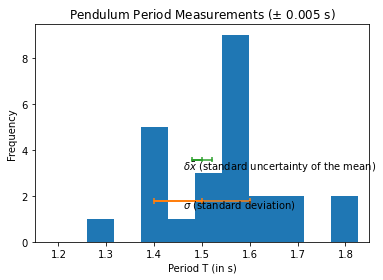

In [29]:
def pendulum_hist(N):
    # Generate a normal distribution, center at x=0 and y=5
    mean = 1.5
    sd = 0.1
    data = np.random.normal(mean, sd, N)

    #Create a histogram of [this] *these* data
    fig, ax = plt.subplots(1)
    ax.hist(data, label = "hi");
    plt.xlim(xmin=1.15, xmax = 1.85)
    plt.title(r"Pendulum Period Measurements ($\pm$ 0.005 s)")
    ax.errorbar(x=[mean+sd, mean -sd,mean], y = [N/14, N/14, N/14], yerr = [N/200, N/200, N/200], label = r"$\sigma$")
    ax.errorbar(x=[mean+sd/np.sqrt(N), mean -sd/np.sqrt(N),mean], y = [N/7, N/7, N/7], yerr = [N/200, N/200, N/200], label = r"$\delta$")
    plt.xlabel("Period T (in s)")
    plt.ylabel("Frequency")
    plt.text(1.46, N/8, r"$\delta \bar{x}$ (standard uncertainty of the mean)")
    plt.text(1.46, N/17, r"$\sigma$ (standard deviation)")
    plt.show()
    return data

data=pendulum_hist(25);

When we take repeated measurements, it is useful to calculate the mean $\bar{x}$ of all of the measurements, as a measure of the center of our measurements. The mean is defined as:

$\bar{x} = \frac{1}{N} \sum_{i = 1}^{N} x_i$

where $N$ is the number of measurements and *$x_i$* is the $i^{th}$ value of the measurement $x$. In python, we can calculate the mean using a built-in function in the *numpy* package (nicknamed *np* here). Run the code cell below to try it on the data from our histogram above.

In [8]:
# an example of calculating mean
np.mean(data)

1.5064839867593063

When we take the same measurement over and over, we will often find some natural variation in the data. If the variation is a result of statistical uncertainty, we can characterize the width of statistical variation with the **standard deviation**, a statistical measure of the uncertainty in a single measurement. The standard deviation characterizes the spread in the distribution of individual values due to statistical uncertainty in the measurement process. In the histogram above, the standard deviation is labeled with $\sigma$.

Some of the desired properties of standard deviation are:

1. We want to incorporate all available points into the calculation.
2. The standard deviation should stay approximately the the same as we add more points with the same level of variation.
3. Standard deviation should increase as we measure more points further away from the mean.
4. The units of standard deviation should be the same as the units of the measurement.
5. The standard deviation should treat values on either side of the mean the same.


Standard deviation is calculated with the following formula:

$\sigma = \sqrt{\frac{1}{N-1} \sum_{i = 1}^{N} (x_i - \bar{x})^2}$

where $N$ is the number of measurements, *$x_i$* is the $i^{th}$ value of the measurement $x$, and $\bar{x}$ is the mean.


(The factor ${N-1}$ in the denominator comes from using one degree of freedom in our data to calculate the mean, which we need for the standard deviation. A consequence of this is that the standrd deviation of a single measurment is undefined. )


### 2. Explain how the formula for $\sigma$ takes into account the five properties above.  (05 points) 

Double click this markdown cell to edit.


>1. All available points are incorporated with the summation for measurements $1$ to $N$ where $x_i$ is each measurement. 
>2. The denominator $N-1$ will increase as we add more points, and compensate for the addition of more points within the same level of variation.   
>3. As we take the difference of each point with the mean, $(x_i - \bar{x})^2$, the measure will show how far away from the mean the point is, and increase the standard deviation if the points are significantly further away.  
>4. As we can see the denominator is unit-less and the quantity $(x_i - \bar{x})^2$ will only square the units. However, a square root is applied to the units reverting them to the units of measure. Thus, the standard deviation does have the same units as the measurement.
>5. Squaring the difference between the measurement and the mean, $x_i - \bar{x}$, will yield a positive measurement of distance from the mean regardless if the measurement is smaller or greater than the mean.


Run the code cells below in sequence to define and use a function for standard deviation on your data above.

In [11]:
def standard_deviation(data):
    N = len(data)
    return np.sqrt(np.sum((data - np.mean(data))**2)/(N-1))

In [10]:
# calculate standard deviation of the data displayed in the histogram above
standard_deviation(data) 

0.11248446957141585

### 3. Look back at the histogram and the formula for standard deviation. Why can the standard deviation $\sigma$ also be viewed as an estimate of the uncertainty in any single measured value? *Hint: consider the averaging behavior of the equation for standard deviation.*  (0.75 points)


> This is because the standard deviation is a measurement of the distance any data point is from the mean. Yet these distances are averaged over the total number of points minus one. This gives an estimate of the distance any measurement would be from the mean, and as an estimate, it carries with it uncertainty. 


### 4. If we added 10 more measurements to our data set, the standard deviation $\sigma$ would not necessarily get larger. Why not?  (0.75 points)

>This is because the standard deviation is a measurement of distance from the mean, and as long as these inclusions are not significantly farther away, 10 or more points would have little effect on the standard deviation. 

Although we calculate standard deviation from our measurements, we use it as a representation of the physical phenomenon. After taking repeated measurements of the same phenomenon, we expect that 68% of our measurements will fall within one standard deviation of the mean. 

A single measurement is informative, but we gain much more information from the mean of a set of multiple measurements. The uncertainty in the mean of multiple measurements, therefore, should have a smaller uncertainty than that of a single measurement. We define the uncertainty in the mean as:

$\delta \bar{x} = \frac{\sigma}{\sqrt{N}}$

where $\sigma$ is the standard deviation and $N$ is the number of measurements. 

This definition serves to reward you for taking more data, so that the uncertainty in the mean of a collection of many measurements is smaller than the uncertainty in any single measurement. 

Note: Read the symbol $\delta$ as "uncertainty in". As discussed above, $\bar{x}$ is the symbol for the mean, so $\delta \bar{x}$ should be read as the mathematical notation for "uncertainty in the mean". It does *not* mean the "uncertainty times the mean".


### 5. Say you have taken *m* measurements (where *m* is some arbitrary number). If you do one hundred times as many measurements (i.e., $100m$), how much smaller is the uncertainty in the mean compared to when you had only had *m* measurements?  (0.75 points)

> As can be seen, the uncertainty of the mean is proportional to the inverse square root of the number of measurements, or $\delta \bar{x} \propto \frac{1}{\sqrt{N}}$, which means any increase in the number of measurements will decrease the uncertainty. Thus, for $100m$ or $N=100$ the uncertainty will be $\frac{1}{10}$ of the uncertainty for $1m$. 

The standard uncertainty of the mean is shown in green in the original histogram at the top of this tutorial. The uncertainty itself is just an estimate, so we usually round it to one digit. 

Below we define a function for calculating the uncertainty in the mean. 
 
### 6. Run the code cells below in sequence to calculate the standard uncertainty of the mean of our histogram data. Is this measurement of the uncertainty larger or smaller than the standard deviation? Explain whether or not that makes sense.  (0.5 points)

> This is significantly smaller than the standard deviation as this measures the uncertainty of the mean. This makes sense as the mean itself is a key indicator of the central tendency of the data. Furthermore, this shows that the given data **does not** have any significant outliers that would skew the mean. 

In [12]:
def standard_unc_of_mean(data):
    N = len(data)
    return standard_deviation(data) / np.sqrt(N)

In [13]:
# an example of calculating standard uncertainty of the mean
standard_unc_of_mean(data)

0.02249689391428317

Let's go back to generating histograms of the results of 25 pendulum measurement trials. 

### 7. Run the cell below and notice that the mean is printed out below the histogram. Copy this mean into the array <span style='font-family:Courier'>all_means</span> in the second code cell. Generate at least nine more datasets by re-running the first code cell, and store the means in <span style='font-family:Courier'>all_means</span>, with each mean separated by a comma.  (0.5 points)
 

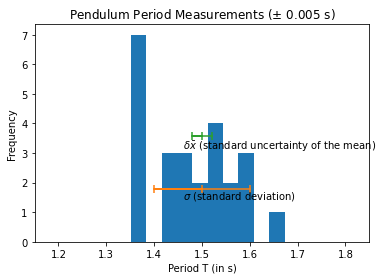

mean is 1.4737 s


In [24]:
hist_data = pendulum_hist(25)
print("mean is " + str("%.4f" %np.mean(hist_data)) + " s") #for the curious,"%.4f" shortens the number of digits, so you don't have to copy and paste as much 


In [27]:
all_means = np.array([1.4767, 1.4892, 1.4976, 1.4935, 1.4983, 1.4696, 1.5128, 1.4724, 1.4793, 1.4737]) #at least 10 means for 10 different histograms

print("standard deviation of our means is " + str("%.4f" % standard_deviation(all_means)) + " s")

standard deviation of our means is 0.0142 s


### 8. How does the standard deviation of our list of means compare to the standard uncertainty of the mean calculated in Q6 (round each to 1 digit), and why does that make sense?  (1 point)


> As can be seen, the standard deviation of the list of means is $\approx 0.01$ while the standard uncertainty of the mean is $\approx 0.02$. This makes sense as the uncertainty of the mean should be less than the uncertainty in each measurement. 

Because the uncertainty of the mean $\delta \bar{x}$ is actually less than the uncertainty in each individual measured value $\sigma$ by a factor $1/\sqrt{N}$, we can reduce the uncertainty in our best estimate of a measured quantity by taking more and more repeated measurements.

### 9. Run the code cell below, which will give you a histogram for 900 repeated trials measuring the period T of our same pendulum. How do the mean, standard deviation, and standard uncertainty of the mean of this data set compare to the data set with 25 repeated trials? Explain in your own words why these results make sense.  (1 point)

>The standard deviation or the mean **did not** change significantly with the addition of more trials, as expected it will not change unless the new points are significantly further away. However, the uncertainty of the mean decreased significantly as the size $N$ increased. This is shown in the relation $\delta \bar{x} \propto \frac{1}{\sqrt{N}}$ where an increase in $N$ decreases $\delta \bar{x}$.  

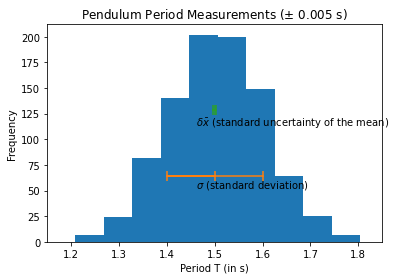

mean is 1.5051 s
standard deviation is 0.0987 s
standard uncertainty of the mean is 0.0033 s


In [28]:
big_data = pendulum_hist(900);
print("mean is " + str("%.4f" % np.mean(big_data)) + " s")
print("standard deviation is " + str("%.4f" % standard_deviation(big_data)) + " s")
print("standard uncertainty of the mean is " + str("%.4f" %standard_unc_of_mean(big_data)) + " s") 

In comparing this histogram with the original histogram for 25 trials, three main features are apparent:

1. The mean appears to be roughly the same as it was for 25 trials.

2. The standard deviation $\sigma$ appears to be roughly the same as it was for 25 trials. The additional trials have simply "filled out" the distribution more smoothly so that the histogram has a more consistent shape.

3. The uncertainty of the mean $\delta \bar{x}$ is noticeably less than it was for 25 trials.

Recall also that the instrumental precision of these measurements was limited to $\pm 0.005$ s by the digital display of the stopwatch.

### 10. How does the uncertainty of the mean of our data set with 900 measurements compare with the instrumental precision of the measuring instrument?  (1 point)

> The instrumental precision is slightly larger than that of the uncertainty of the mean by $0.0017$, yet this difference is not very significant. Comparing the two I believe the uncertainty of the mean is nearly identical to that of the instrumental precision.

### 11. What does this say about the possibility of "beating instrumental precision" by taking repeated measurements? (1 point)

> This would mean there could be a possibility of beating instrumental precision as the uncertainty of the mean was less than the instrumental precision. The increased data taken could help beat the instrumental precision if: $ \delta \bar{x}\propto$ *instrumental precision*. 

### 12. Write the best estimate for the pendulum's period T from these 900 trials in the form $T = \bar{T} \pm \delta$. Use the template given below.  (0.75 points)

$T = 1.5051 \pm 0.0987$ *seconds*.

### 13. If the standard deviation for repeated measurements of the period of this pendulum is around 0.1 s, roughly how many repeated measurements of the pendulum period would be needed to reduce the uncertainty of the mean to $1/2$ of the instrumental precision of 0.005 s (i.e., as small as 0.0025 s)?  (0.75 points)



> To find the number of measurements needed to reduce $\delta \bar{x}$ to $0.0025$ seconds we solve for $N$:
\begin{align*}
\delta \bar{x} = \frac{\sigma}{\sqrt{N}} & \longrightarrow  N = \bigg( \frac{\sigma}{\delta \bar{x}} \bigg)^2\\
\\
N =& \bigg( \frac{0.1s}{0.0025s} \bigg)^2\\
\\
N =& 1600
\end{align*}


>Thus, 1600 repeated measurements are required to reduce the uncertainty of the mean to $1/2$ of the given instrumental precision.


Save your notebook with all your answers to the questions, modified code cells, and output from each code cell. Submit your notebook by uploading it to the Canvas assignment.